In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [9]:
data = pd.read_csv("Instagram.csv", encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0          262         59             27           152           0      1   
1          118         56             16             0           3      0   
2          150         54             38             0           4      0   
3          272         61             12             0           2      1   

   Comments  Shares  Likes  Profile Visits  Follows  \
0        22       2     40               3        0   
1         4       0     27               4        0   
2        18       0     33               3        0   
3         8       0     24               2        0   

                                             Caption  \
0                                 Weekend photo dump   
1  The thing was stuck in my mind since yesterday...   
2                                                NaN   
3  The best in the country, no doubt about it. Th...   

                                            Hashtags  
0 

In [10]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           1
Hashtags          0
dtype: int64

In [11]:
data=data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 3
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     3 non-null      int64 
 1   From Home       3 non-null      int64 
 2   From Hashtags   3 non-null      int64 
 3   From Explore    3 non-null      int64 
 4   From Other      3 non-null      int64 
 5   Saves           3 non-null      int64 
 6   Comments        3 non-null      int64 
 7   Shares          3 non-null      int64 
 8   Likes           3 non-null      int64 
 9   Profile Visits  3 non-null      int64 
 10  Follows         3 non-null      int64 
 11  Caption         3 non-null      object
 12  Hashtags        3 non-null      object
dtypes: int64(11), object(2)
memory usage: 336.0+ bytes


# Instagram Reach

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


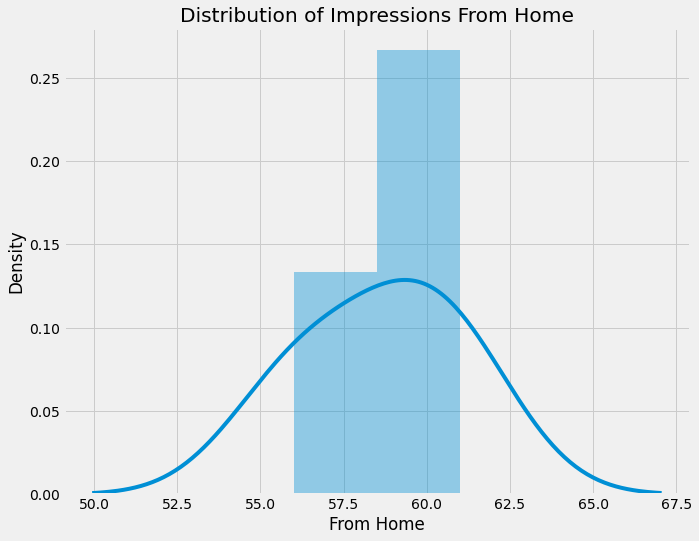

In [13]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


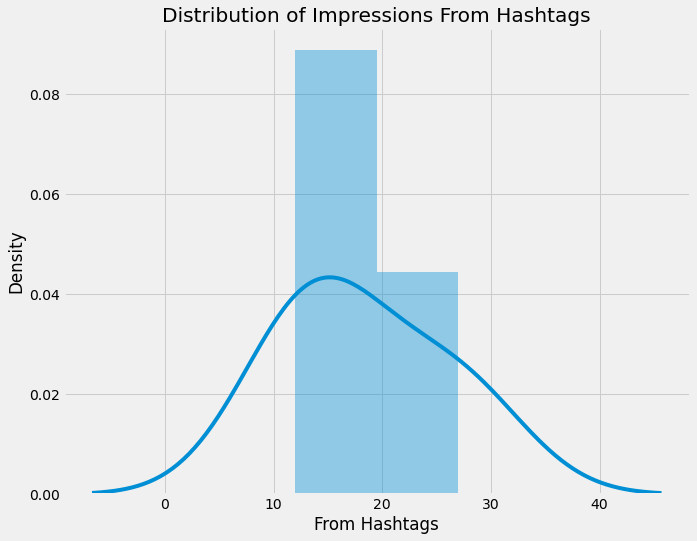

In [14]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

In [15]:
home=data["From Home"].sum()
hashtags=data["From Hashtags"].sum()
explore=data["From Explore"].sum()
other=data["From Other"].sum()

In [16]:
labels=['From Home','From Hashtags','From Explore','Other']
values=[home,hashtags,explore,other]

In [17]:
fig = px.pie(data, values=values, names=labels,
          title='Impressions on Instagram Post from Various Sources', hole=0.5)
fig.show()

# Analyzing Content

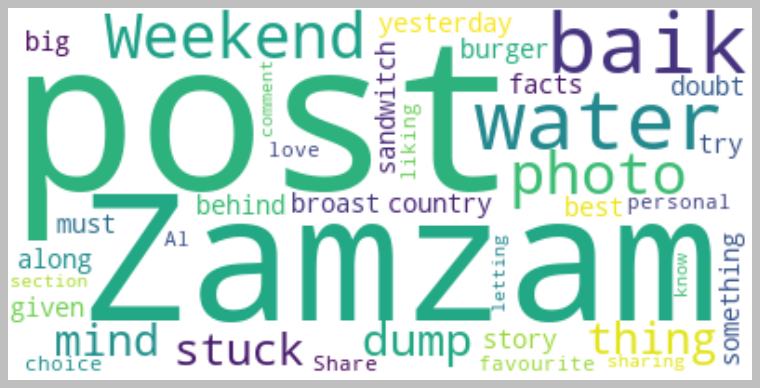

In [38]:
text=" ".join(i for i in data.Caption)
stopwords=set(STOPWORDS) #Stopwords are the English words which does not add much meaning to a sentence.
wordcloud=WordCloud(stopwords=stopwords, background_color="white").generate(text) #Word Cloud data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear') #imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
plt.axis("off")
plt.show()

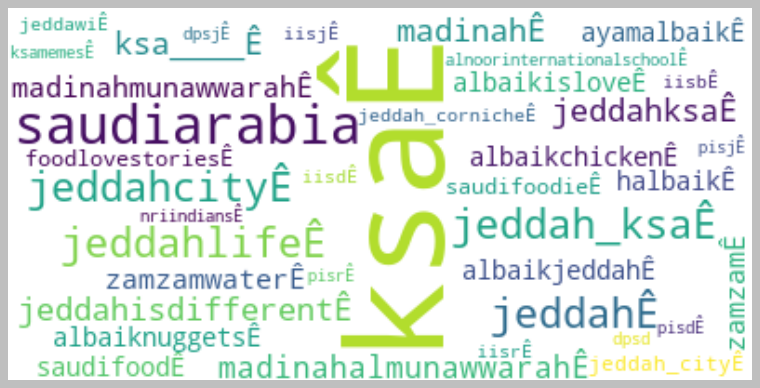

In [39]:
text=" ".join(i for i in data.Hashtags)
stopwords=set(STOPWORDS) #Stopwords are the English words which does not add much meaning to a sentence.
wordcloud=WordCloud(stopwords=stopwords, background_color="white").generate(text) #Word Cloud data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear') #imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
plt.axis("off")
plt.show()

# Analyzing Realationships

In [18]:
# px express module (usually imported as px ) contains functions that can create entire figures at once
figure=px.scatter(data_frame = data, x="Impressions", 
                  y="Likes",size="Likes",trendline="ols",
                  title="Relationship Between Likes and Impressions") 
figure.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [19]:
figure=px.scatter(data_frame = data, x="Impressions", 
                  y="Comments",size="Comments",trendline="ols",
                  title="Relationship Between Comment and Total Impressions") 
figure.show()

In [20]:
figure=px.scatter(data_frame = data, x="Impressions", 
                  y="Shares",size="Shares",trendline="ols",
                  title="Relationship Between Shares and Total Impressions") 
figure.show()

In [45]:
figure=px.scatter(data_frame = data, x="Impressions", 
                  y="Saves",size="Saves",trendline="ols",
                  title="Relationship Between Likes and Impressions") 
figure.show()

In [46]:
correlation=data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Home         0.999140
From Other        0.997512
Shares            0.996196
From Hashtags    -0.384926
Profile Visits   -0.587809
Likes            -0.713071
Saves            -0.935481
Comments         -0.999616
From Explore           NaN
Follows                NaN
Name: Impressions, dtype: float64


# Analyzing Conversion Rate

In [47]:
conversion_rate=(data["Follows"].sum()/data["Profile Visits"].sum())*100
print(conversion_rate)

0.0
